# Artificial Neural Network

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
tf.__version__

'2.18.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [4]:
data = pd.read_csv('Fraud.csv')

X = data.iloc[:,2:-2].values
y = data.iloc[:, -1].values

In [5]:
print(X)

[[242.0 302.0 60.0 'TRANSFER' 'Gold' 'Food']
 [7081.0 46066.0 38985.0 'TRANSFER' 'Gold' 'Entertainment']
 [16355.0 30355.0 14000.0 'TRANSFER' 'Silver' 'Fuel']
 ...
 [77083.57 38400000.0 38322916.43 'CASH_IN' 'Gold' 'Fuel']
 [121569.82 38400000.0 38278430.18 'CASH_IN' 'Platinum' 'Grocery']
 [6808.99 38900000.0 38893191.01 'CASH_IN' 'Signature' 'Bills']]


In [6]:
print(y)

[1 1 1 ... 0 0 0]


In [7]:
df = pd.DataFrame(data)

In [8]:
df.head()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.0,302.0,60.0,TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.0,46066.0,38985.0,TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.0,30355.0,14000.0,TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.0,39663.0,18843.0,TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.0,35586.0,29515.0,TRANSFER,Gold,Fuel,M,1


In [9]:
print(df['Exp Type'].unique())

['Food' 'Entertainment' 'Fuel' 'Bills' 'Grocery' 'Travel' 'Personal_Care'
 'Health_Fitness' 'Home']


In [10]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Step 1: Encode 'type', 'Card Type', and 'Exp Type' using OneHotEncoder
onehot_columns = ['type', 'Card Type', 'Exp Type']
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output=False instead of sparse
onehot_encoded = onehot_encoder.fit_transform(data[onehot_columns])

# Step 2: Label encode 'Gender'
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

# Step 3: Drop the one-hot-encoded columns and unwanted columns ('Date' and 'nameOrig') from the original data
data = data.drop(columns=onehot_columns + ['Date', 'nameOrig'])

# Step 4: Concatenate one-hot-encoded features with the remaining features
X = pd.concat([data.drop(columns=['isFraud']), pd.DataFrame(onehot_encoded)], axis=1)

# Step 5: Label encode the dependent variable ('isFraud')
label_encoder_fraud = LabelEncoder()
y = label_encoder_fraud.fit_transform(data['isFraud'])

# Display results
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1048574, 21)
Shape of y: (1048574,)


In [11]:
print(X)

            amount  oldbalanceOrg  newbalanceOrig  Gender    0    1    2    3  \
0           242.00          302.0           60.00       0  0.0  0.0  0.0  1.0   
1          7081.00        46066.0        38985.00       1  0.0  0.0  0.0  1.0   
2         16355.00        30355.0        14000.00       0  0.0  0.0  0.0  1.0   
3         20820.00        39663.0        18843.00       0  0.0  0.0  0.0  1.0   
4          6071.00        35586.0        29515.00       1  0.0  0.0  0.0  1.0   
...            ...            ...             ...     ...  ...  ...  ...  ...   
1048569  105150.78     38300000.0     38194849.22       0  0.0  0.0  0.0  0.0   
1048570  376022.62     38600000.0     38223977.38       0  0.0  0.0  0.0  0.0   
1048571   77083.57     38400000.0     38322916.43       0  0.0  0.0  0.0  0.0   
1048572  121569.82     38400000.0     38278430.18       0  0.0  0.0  0.0  0.0   
1048573    6808.99     38900000.0     38893191.01       1  0.0  0.0  0.0  0.0   

           4    5  ...    7

### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [13]:
np.savetxt("features_matrix1.txt", X_train, fmt='%s', delimiter=",")
print("Matrix saved to 'features_matrix1.txt'")

Matrix saved to 'features_matrix1.txt'


In [14]:
print(X_train)

          amount  oldbalanceOrg  newbalanceOrig  Gender    0    1    2    3  \
351361   2743.00        4221.00         1478.00       0  1.0  0.0  0.0  0.0   
696834   3927.75       15376.00        11448.25       1  0.0  0.0  1.0  0.0   
375900     73.00          98.00           25.00       1  0.0  0.0  0.0  0.0   
370773   5085.00        5480.00          395.00       0  0.0  0.0  0.0  0.0   
175763   3302.00        9152.00         5850.00       1  1.0  0.0  0.0  0.0   
...          ...            ...             ...     ...  ...  ...  ...  ...   
963395  26135.45     3012164.11      2986028.66       1  0.0  0.0  0.0  0.0   
117952  17568.00       40434.00        22866.00       1  1.0  0.0  0.0  0.0   
435829      0.00           0.00            0.00       1  1.0  0.0  0.0  0.0   
305711    367.00        7128.00         6761.00       0  0.0  0.0  0.0  0.0   
985772  94018.04     4877481.70      4783463.66       0  0.0  0.0  0.0  0.0   

          4    5  ...    7    8    9   10   11   12

In [15]:
print(y_train)

[0 0 0 ... 0 0 0]


In [16]:
print("y_train values:", y_train)
print("Unique values in y_train:", np.unique(y_train))

y_train values: [0 0 0 ... 0 0 0]
Unique values in y_train: [0 1]


In [17]:
print("Are there missing values in y?", pd.isnull(y).any())

Are there missing values in y? False


In [18]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the target values
#y_train = to_categorical(y_train, num_classes=3)  # Assuming 3 classes
#y_test = to_categorical(y_test, num_classes=3)    # Do the same for y_test if you are using it for validation

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [19]:
print(y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [20]:
print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

if isinstance(X, pd.DataFrame):
    X.columns = X.columns.astype(str)

if isinstance(X_train, pd.DataFrame):
    X_train = X_train.to_numpy()
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.to_numpy()

# Convert y to NumPy arrays if necessary
if isinstance(y_train, pd.Series):
    y_train = y_train.to_numpy()
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)  # Fit and transform X_train
X_test = scaler_X.transform(X_test)       # Transform X_test using the same scaler


# Feature scaling for y (if necessary, e.g., if y contains continuous values)
# If y is binary (e.g., 0 and 1), scaling is not required
if len(set(y)) > 2:  # Check if y contains more than two unique values
    scaler_y = StandardScaler()
    y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
    y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (702544, 21)
X_test shape: (346030, 21)
y_train shape: (702544, 3)
y_test shape: (346030, 3)


## Part 2 - Building the ANN

### Initializing the ANN

In [22]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [23]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [24]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [25]:
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Part 3 - Training the ANN

### Compiling the ANN

In [26]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [27]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8491 - loss: 0.3644
Epoch 2/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.8611 - loss: 0.3214
Epoch 3/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.8621 - loss: 0.3206
Epoch 4/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8624 - loss: 0.3200
Epoch 5/5
21955/21955 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.8622 - loss: 0.3191


## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [28]:
y_pred = ann.predict(X_test)

10814/10814 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


In [29]:
type(y_pred)

numpy.ndarray

In [32]:

# Find the maximum probability for each prediction
max_probabilities = np.max(y_pred, axis=1)
# Categorize predictions based on probability thresholds
y_pred_flat = np.where(max_probabilities > 0.75, 2,
               np.where(max_probabilities > 0.25, 1, 0))
y_test_flat = np.argmax(y_test, axis=1)

predictions_df = pd.DataFrame({
    'Actual': y_test_flat,
    'Predicted': y_pred_flat,
    'Probability': max_probabilities
})

predictions_df.to_csv('predictions4.csv', index=False)
print("Predictions saved to 'predictions4.csv'")


Predictions saved to 'predictions4.csv'


### Making the Confusion Matrix

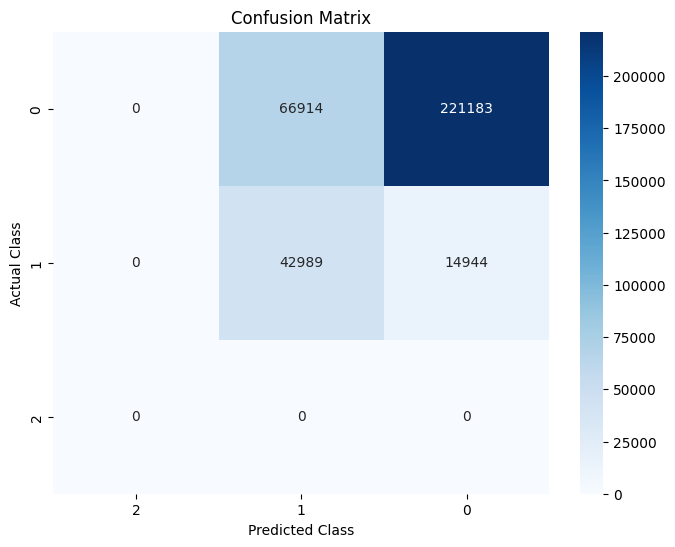

In [33]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_flat, y_pred_flat)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[2, 1, 0], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()